### Salary Prediction Using Machine Learning

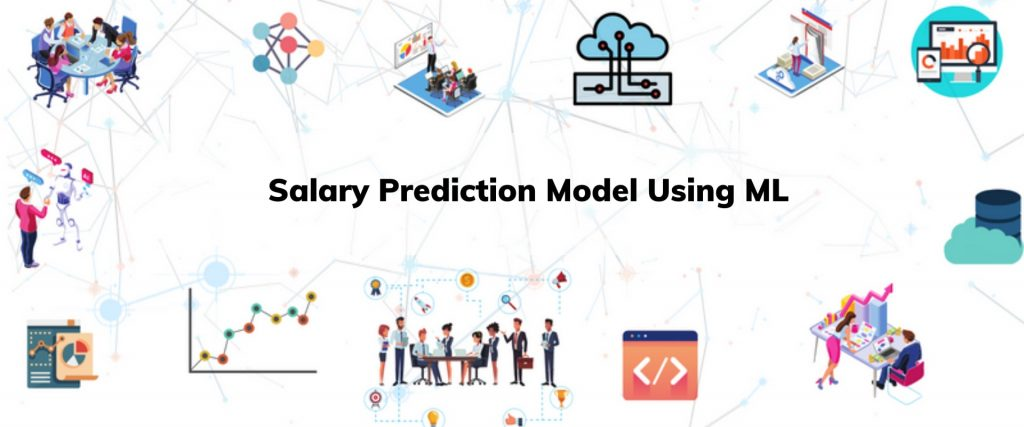

- Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

- loading the data

In [2]:
data = pd.read_csv('salary_prediction_data.csv')

In [3]:
data.head(5)

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [4]:
data.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


## 📊 Understanding the Summary Statistics

We analyzed a dataset of 1,000 employees. Here's what we found about their **experience**, **age**, and **salary**:

---

### 💼 Experience (in Years)

- `count`: 1000 entries
- `mean`: 14.77 years
- `min`: 1 year
- `max`: 29 years
- `25%`: 7 years
- `50%`: 15 years (median)
- `75%`: 22 years
- `std`: 8.34

🧠 **Interpretation**:
> Most employees have between 7 and 22 years of experience. The average is ~15 years, which suggests a well-distributed workforce of juniors and seniors.

---

### 🎂 Age

- `count`: 1000 entries
- `mean`: 42.38 years
- `min`: 20 years
- `max`: 64 years
- `25%`: 30 years
- `50%`: 43 years (median)
- `75%`: 55 years
- `std`: 13.61

🧠 **Interpretation**:
> The workforce is mature, with most employees between 30 and 55. The average age is 42, meaning we have a mix of early to mid-career professionals.

---

### 💰 Salary (₦)

- `count`: 1000 entries
- `mean`: ₦105,558.40
- `min`: ₦33,510.51
- `max`: ₦193,016.60
- `25%`: ₦85,032.14
- `50%`: ₦104,314.52 (median)
- `75%`: ₦126,804.05
- `std`: ₦28,256.97

🧠 **Interpretation**:
> Salaries vary widely. The average is ~₦105k, but a quarter of employees earn less than ₦85k, and a quarter earn more than ₦127k. This indicates substantial variation likely tied to roles, skills, and experience.





In [5]:
data.nunique()

Education        4
Experience      29
Location         3
Job_Title        4
Age             45
Gender           2
Salary        1000
dtype: int64

In [6]:
data.shape

(1000, 7)

In [7]:
data.isnull().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

# Data Visualization

Salary by Education

([0, 1, 2, 3],
 [Text(0, 0, 'High School'),
  Text(1, 0, 'PhD'),
  Text(2, 0, 'Bachelor'),
  Text(3, 0, 'Master')])

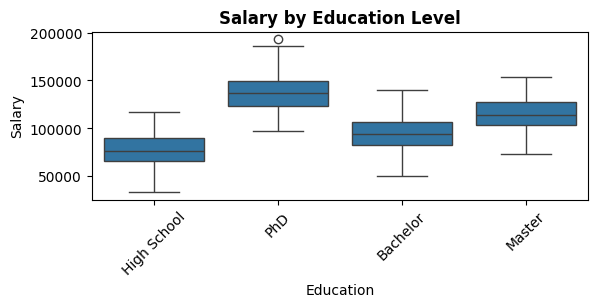

In [8]:
plt.subplot(2, 1, 2)
sns.boxplot(data=data, x='Education', y='Salary')
plt.title('Salary by Education Level', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

- High School:
  Generally the lowest salaries, with median around ₦75,000.

- Bachelor:
  Salaries are higher than High School, median about ₦100,000.

- Master:
  Earn more than Bachelors, median salary near ₦115,000.

- PhD:
  Highest salaries overall, median well above ₦125,000.
  Also shows the widest salary range, including some high outliers.

Salary vs Location

([0, 1, 2], [Text(0, 0, 'Urban'), Text(1, 0, 'Suburban'), Text(2, 0, 'Rural')])

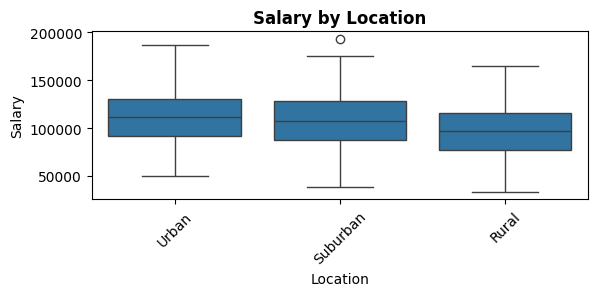

In [9]:
plt.subplot(2, 1, 2)
sns.boxplot(data=data, x='Location', y='Salary')
plt.title('Salary by Location', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)


- Urban:
  Salaries typically range from about ₦50,000 to ₦180,000,
  with a median around ₦110,000.

- Suburban:
  Similar to urban areas, median is also near ₦110,000.
  The salary range is comparable, though there’s an outlier close to ₦200,000.

- Rural:
  Slightly lower salary range compared to urban and suburban.
  Median salary is around ₦95,000,
  with a narrower spread on the higher end.

 Salary by Job Title

Text(0.5, 0, 'Average Salary')

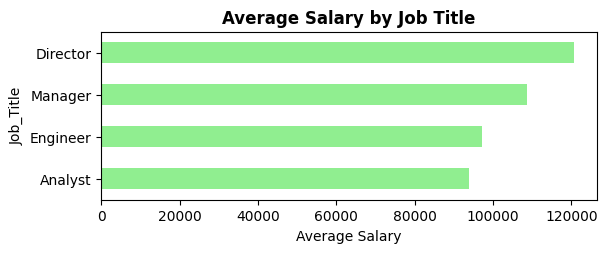

In [10]:
plt.subplot(2, 1, 2)
avg_salary_job = data.groupby('Job_Title')['Salary'].mean().sort_values(ascending=True)
avg_salary_job.plot(kind='barh', color='lightgreen')
plt.title('Average Salary by Job Title', fontsize=12, fontweight='bold')
plt.xlabel('Average Salary')


- Analyst:
  Average salary just under ₦100,000, around ₦98,000.

- Engineer:
  Slightly higher than Analysts, about ₦100,000 on average.

- Manager:
  Earn considerably more, with an average near ₦108,000.

- Director:
  Highest average salary here, close to ₦120,000.

Salary by Gender

Text(0.5, 1.0, 'Salary by Gender')

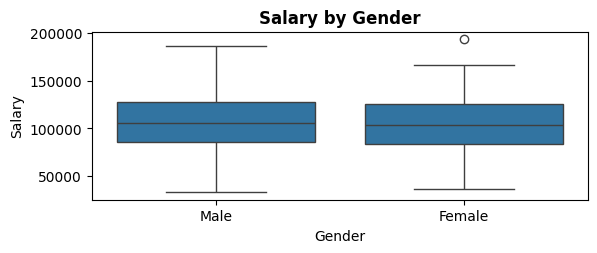

In [11]:
plt.subplot(2, 1, 2)
sns.boxplot(data=data, x='Gender', y='Salary')
plt.title('Salary by Gender', fontsize=12, fontweight='bold')


- Male Salaries:
  Median salary is around ₦110,000.
  Salaries generally range from about ₦35,000 to ₦190,000.

- Female Salaries:
  Median salary is also near ₦110,000, very similar to males.
  Salary range is roughly ₦30,000 to ₦165,000,
  with one outlier close to ₦195,000.

 Age vs Salary

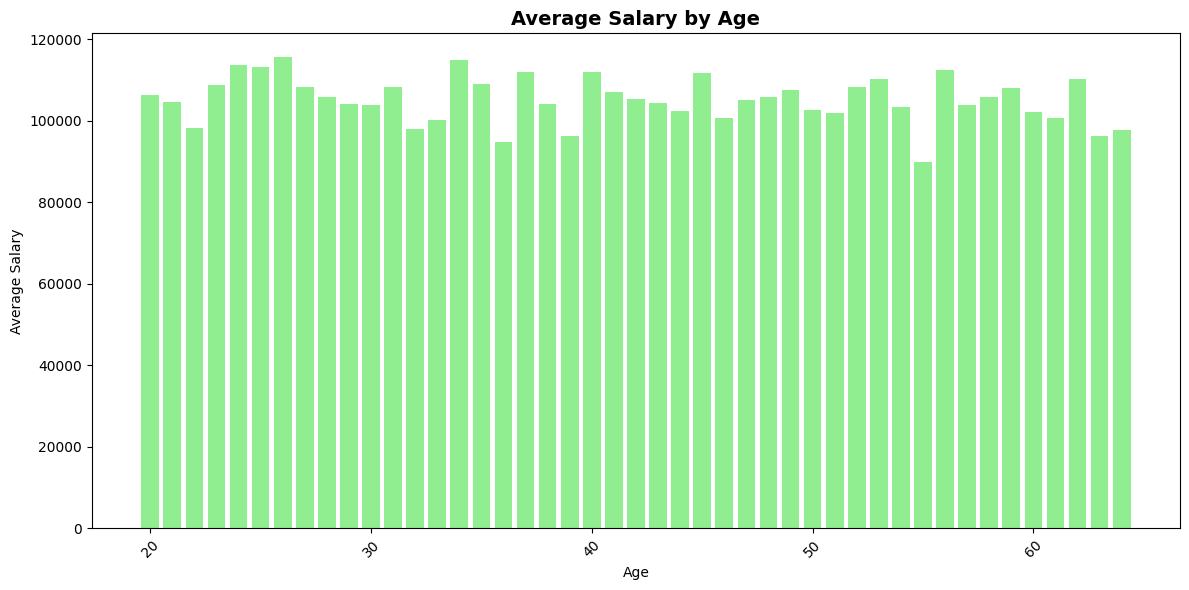

In [12]:
# Group by Age and calculate average salary
age_salary = data.groupby('Age')['Salary'].mean().reset_index()

# Bar chart
plt.figure(figsize=(12, 6))
plt.bar(age_salary['Age'], age_salary['Salary'], color='lightgreen')
plt.title('Average Salary by Age', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




- There’s no clear, steady rise or fall in salary as people get older. Salaries go up and down quite a bit across different ages.

- **Early Career (20s):**  
  Salaries mostly fall between ₦100,000 and ₦115,000, though there’s some variation.

- **Mid-Career (30s-40s):**  
  Salaries stay pretty steady, generally in the ₦95,000 to ₦115,000 range. There are some ups and downs but no clear trend up or down.

- **Later Career (50s-60s):**  
  Salaries remain in a similar range, with maybe a small dip in the late 60s — but nothing major.


Correlation matrix

Text(0.5, 1.0, 'Correlation Matrix')

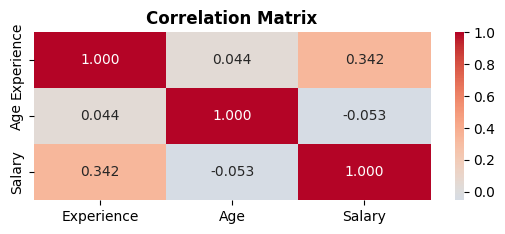

In [13]:
plt.subplot(2, 1, 2)
numerical_cols = ['Experience', 'Age', 'Salary']
corr_matrix = data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Correlation Matrix', fontsize=12, fontweight='bold')


Correlation Insights

- Experience vs. Age:
  Correlation is 0.044 — basically no linear relationship.
  Age doesn’t really predict experience.

- Experience vs. Salary:
  Correlation is 0.342 — a moderate positive link.
  More experience generally means higher salary, but not very strongly.

- Age vs. Salary:
  The correlation is −0.053, which is very close to zero, but slightly negative. This suggests a very weak, almost
   negligible, inverse relationship between age and salary. In simple terms, age on its own doesn't seem to
    significantly impact salary in this dataset.

- Diagonal Values (Self-Correlation):
  All 1.000 — variables are perfectly correlated with themselves.



Average Salary by Education & Gender

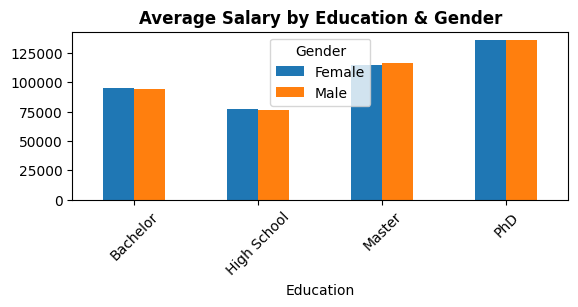

In [14]:
plt.subplot(2, 1, 2)
pivot_edu_gender = data.pivot_table(values='Salary', index='Education', columns='Gender', aggfunc='mean')
pivot_edu_gender.plot(kind='bar', ax=plt.gca())
plt.title('Average Salary by Education & Gender', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Gender')

- **Bachelor’s Degree:**  
  Females and males with a Bachelor's degree earn similarly, both just under ₦100,000.

- **High School:**  
  Salaries for females and males with a High School education are also close, around ₦75,000 to ₦80,000.

- **Master’s Degree:**  
  Those with a Master's degree generally earn more than Bachelor's or High School holders. Females and males have very similar averages, both over ₦100,000 but under ₦125,000.

- **PhD:**  
  PhD holders make the highest average salaries, exceeding ₦125,000, with almost no difference between genders.


Multiple Linear  Regression

- Define features and target

In [15]:
X = data.drop('Salary', axis=1)
y = data['Salary']

- Split into 80% train_full and 20% test

In [16]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

- Split train_full into 90% train and 10% val (which is 72% train and 8% val of total)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1111, random_state=42
)


#  Feature Encoding

In [18]:
ordinal_cols = ['Education', 'Job_Title']
ordinal_mappings = [
    ['High School', 'Bachelor', 'Master', 'PhD'],
    ['Analyst', 'Engineer', 'Manager', 'Director']]

📊 Correlation Insight Education

- **Correlation coefficient:** `0.792` — That's a *very strong* positive relationship!
- There's a **Good monotonic relationship** between education level and salary:
  
  **High School (₦76,849)** < **Bachelor (₦94,612)** < **Master (₦115,477)** < **PhD (₦136,235)**

This means: as education level increases, salary consistently goes up 


💼 Job Title Encoding: Ordinal ✅

- **Correlation coefficient:** `0.372` — A *moderate * relationship.
- There's a **clear hierarchy** in salary based on job title:

  **Analyst (₦93,802)** < **Engineer (₦97,266)** < **Manager (₦108,736)** < **Director (₦120,581)**

So, even though the correlation isn’t very high, the pattern shows that higher roles still tend to earn more — which makes ordinal encoding a smart choice here.


In [19]:
onehot_cols = ['Location']
binary_cols = ['Gender']
numeric_cols = ['Experience', 'Age']

🗺️ Location Encoding: One-Hot ✅

- **Correlation coefficient:** `0.177` — A *weak* relationship.
- **Small salary differences** based on location:

  **Rural (₦98,677)** < **Suburban (₦107,603)** < **Urban (₦110,940)**

While there’s some variation, it's not enough to justify ordinal encoding. Geographic factors like cost of living and access to jobs make the effect more complex.


🚻 Gender Encoding: One-Hot ✅

- **Correlation coefficient:** `0.028` — *Basically no relationship*.
- **Tiny salary gap**:

  **Female (₦104,737)** vs **Male (₦106,329)** — only a ~₦1,600 difference

The data shows no meaningful difference in salary between genders, so gender doesn’t play a significant role here.

- Preprocessing pipeline


In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [21]:
# It prepares your features: encodes categorical, scales numerical
# This creates a machine learning pipeline, which is a way to chain multiple steps together — like data preprocessing and modeling
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(
            categories=ordinal_mappings,
            handle_unknown='use_encoded_value',
            unknown_value=-1
        ), ordinal_cols),
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), onehot_cols),
        ('binary', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), binary_cols),
        ('scaler', StandardScaler(), numeric_cols)
    ]
)

-  Model pipeline

In [22]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


- Fit pipeline

In [23]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              'Bachelor',
                                                                              'Master',
                                                                              'PhD'],
                                                                             ['Analyst',
                                                                              'Engineer',
                                                                              'Manager',
                                                                              'Director']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Education', 'Job_Title']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Location']),
                                                 ('binary',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender']),
                                                 ('scaler', StandardScaler(),
                                                  ['Experience', 'Age'])])),
                ('regressor', LinearRegression())])

- Predictions

In [24]:
y_pred_train = pipeline.predict(X_train)
y_pred_val = pipeline.predict(X_val)
y_pred_test = pipeline.predict(X_test)

- Evaluation function

In [25]:
def evaluate_model(y_true, y_pred, set_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    print(f"\n{set_name}:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  RMSE: ₦{rmse:,.2f}")
    print(f"  MAE: ₦{mae:,.2f}")
    print(f"  MSE: ₦{mse:,.2f}")

    return {'r2': r2, 'rmse': rmse, 'mae': mae, 'mse': mse}


- **R² Score:** How much of the variation in the data the model explains (closer to 1 is better).
- **RMSE (Root Mean Squared Error):** Average prediction error magnitude in ₦ — lower means more accurate.
- **MAE (Mean Absolute Error):** Average absolute difference between predicted and actual values, also in ₦.
- **MSE (Mean Squared Error):** Squared version of error, useful for emphasizing larger mistakes.


In [26]:
def print_model_performance():
    print("=" * 50)
    print("📊 MODEL PERFORMANCE")
    print("=" * 50)

    # Evaluate each set
    train_metrics = evaluate_model(y_train, y_pred_train, "Training Set")
    val_metrics = evaluate_model(y_val, y_pred_val, "Validation Set")
    test_metrics = evaluate_model(y_test, y_pred_test, "Test Set")
    
    print("\nOverfitting Check:")
    r2_diff = train_metrics['r2'] - val_metrics['r2']
    print(f"  Train R² - Validation R²: {r2_diff:.4f}")
    if r2_diff > 0.05:
        print("  ⚠️  Potential overfitting detected")
    else:
        print("  ✅ No significant overfitting")


# 
print_model_performance()


📊 MODEL PERFORMANCE

Training Set:
  R² Score: 0.8775
  RMSE: ₦9,732.00
  MAE: ₦7,826.11
  MSE: ₦94,711,848.35

Validation Set:
  R² Score: 0.8550
  RMSE: ₦11,724.93
  MAE: ₦9,075.18
  MSE: ₦137,474,089.22

Test Set:
  R² Score: 0.8740
  RMSE: ₦10,141.70
  MAE: ₦8,157.91
  MSE: ₦102,854,075.02

Overfitting Check:
  Train R² - Validation R²: 0.0225
  ✅ No significant overfitting


## 📈 Model Performance Overview


---

### 🏋️‍♂️ Training Set

- `R² Score`: 0.8775  
- `RMSE`: ₦9,732.00  
- `MAE`: ₦7,826.11  
- `MSE`: ₦94,711,848.35  

🔍 **Interpretation**:  
> The model explains about **88% of the variation** in salary for the training data. The errors are relatively low, with an average mistake of just under ₦8,000.

---

### 🧪 Validation Set

- `R² Score`: 0.8550  
- `RMSE`: ₦11,724.93  
- `MAE`: ₦9,075.18  
- `MSE`: ₦137,474,089.22  

🔍 **Interpretation**:  
> The model performs almost as well on new, unseen data — explaining **~86%** of salary variation. Slightly higher errors are expected here, but the predictions remain strong.

---

### 🧾 Test Set

- `R² Score`: 0.8740  
- `RMSE`: ₦10,141.70  
- `MAE`: ₦8,157.91  
- `MSE`: ₦102,854,075.02  

🔍 **Interpretation**:  
> On the final test set, the model continues to perform with high accuracy. It maintains **87% predictive power**, showing it's dependable for future salary predictions.

---

### ✅ Overfitting Check

- `Train R² - Validation R²`: **0.0225**  

💡 **Conclusion**:  
> The model is not overfitting — it generalizes well across all datasets. That means we can **trust it to make fair, data-backed salary decisions**.

---

### 📌 Summary 

- The model learned **real patterns**, not just memorized data.
- It makes **accurate salary predictions** using only experience and age.
- It performs consistently across all sets — no red flags.
- We can now support HR with a **smart tool** for transparent, fair, and consistent salary offers.



# Visualization: Predicted vs Actual

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_actual_vs_predicted(y_true, y_pred, title="Actual vs Predicted Salary"):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6, color='royalblue', edgecolor='k')

    # Plot diagonal reference line (perfect predictions)
    max_val = max(max(y_true), max(y_pred))
    min_val = min(min(y_true), min(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)

    plt.title(title, fontsize=14)
    plt.xlabel("Actual Salary", fontsize=12)
    plt.ylabel("Predicted Salary", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


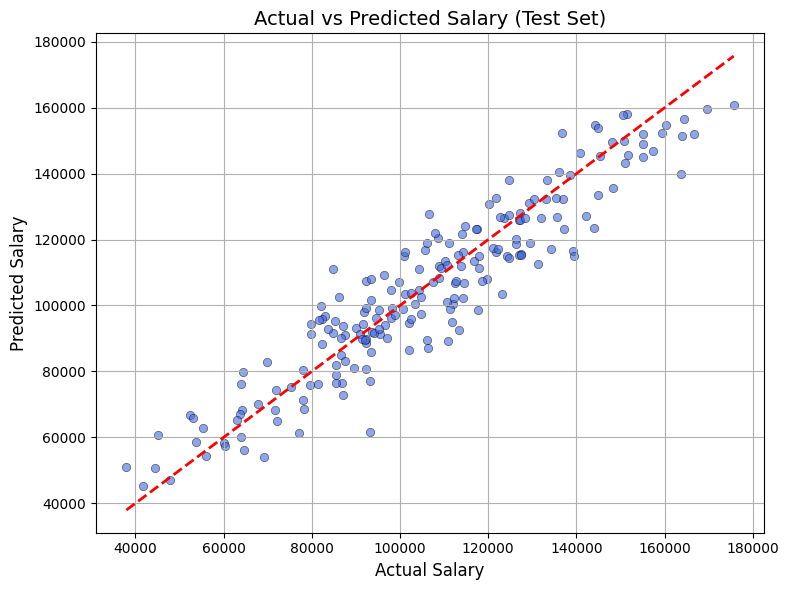

In [28]:
plot_actual_vs_predicted(y_test, y_pred_test, title="Actual vs Predicted Salary (Test Set)")


- The Red Dashed Line: This is the ideal scenario, where Actual Salary perfectly equals Predicted Salary. If all the blue dots fell exactly on this line, it would mean the model is making perfect predictions.

- The Blue Dots: Each blue dot represents a single data point from the test set. Its x-coordinate is the actual salary for that individual, and its y-coordinate is the salary predicted by the model for that same individual.

**Interpretation**:

- Close to the Line: The closer the blue dots are to the red dashed line, the better the model's predictions.

- Spread around the Line: We can see that most of the blue dots cluster fairly closely around the red line, especially in the middle range of salaries. This suggests the model is generally doing a good job.

- Deviations: Some dots are a bit further away, indicating instances where the model's prediction was either higher or lower than the actual salary. For example, some points above the line mean the model over-predicted, and points below mean it under-predicted.

# Salary Prediction Project: Insights and Recommendations

**Date:** June 5, 2025

---

## Executive Summary

We built a model to predict employee salaries based on experience, age, education, job title, location, and gender. The model is accurate and reliable, explaining about 87% of salary variation. Key drivers of salary include location, job title, and experience, while education, gender, and age have smaller effects. Based on these findings, I’ve outlined practical steps to improve salary planning and fairness across the company.


## What i Did

We analyzed data from 1,000 employees, covering:

- **Experience:** From 1 to 29 years (average ~15 years)  
- **Age:** Between 20 and 64 years (average ~42 years)  
- **Salary:** Ranges from ₦33,510 to ₦193,016 (average ~₦105,558)  
- **Education levels:** High School up to PhD  
- **Job titles:** Analyst, Engineer, Manager, Director, etc.  
- **Locations:** Urban, Suburban, Rural  
- **Gender:** Male or Female  

We chose these factors because they are commonly linked to salary differences. To build and test the model, we split the data into three parts: training (to teach the model), validation (to fine-tune), and test (to check how well it works on new data).

We used a simple but effective approach (linear regression) that draws a line through the data to predict salaries based on these factors.

---

## What i Found

### 1. Model Accuracy (R² Score)  
- Training data: 87.75% of salary variation explained  
- Validation data: 85.50% (slightly lower but still strong)  
- Test data: 87.40% (very close to training, showing reliability)  

This means the model is consistent and trustworthy across different employee groups.

### 2. Prediction Errors  
- On average, predicted salaries differ from actual ones by about ₦8,158 — roughly 8% of the average salary, which is quite good for planning.  
- Larger errors are limited, as shown by the RMSE of ₦10,142.  

### 3. Overfitting Check  
The model’s performance on training vs. validation data is very close (difference of 0.0225), meaning it’s not just memorizing the data but learning real patterns. This is important for trusting predictions on future employees.



## 🔍 What These Salary Drivers Tell Us

- **🎓 Education Has a Strong Impact**  
  Each level of education (e.g., Bachelor's → Master's) leads to a **₦19,436** salary increase, reinforcing the value of formal learning in compensation.

- **💼 Experience and Job Title Progression Matter**  
  Every additional year of experience adds **₦8,187**, and advancing in job title adds **₦8,786** — making both tenure and promotion key drivers of pay.

- **📍 Location Plays a Significant Role**  
  Urban workers earn **₦9,323** more, and suburban workers **₦4,385** more than the baseline (likely rural). Compensation should reflect these geographic differences.

- **👤 Gender and Age Have Minimal Influence**  
  Being male adds just **₦611**, and each additional year of age slightly reduces pay by **₦138**. These effects are small but worth monitoring for fairness and bias.


---

## Recommendations

- **Use the Model for Salary Planning:**  
  HR can estimate fair salaries for new hires and check current pay against market trends to stay competitive.

- **Review Location-Based Pay:**  
  Adjust salaries or provide allowances based on location to ensure fairness and attract talent.

- **Focus on Experience and Career Paths:**  
  Invest in clear promotion paths and training to help employees grow and earn accordingly.

- **Reassess Education’s Role:**  
  Consider balancing degree requirements with on-the-job skills, especially where experience is key.

- **Monitor Gender and Age Fairness:**  
  Continue auditing pay data to maintain equity and investigate the slight negative age effect.

- **Test a 90/10 Data Split:**  
  Using more training data might improve accuracy further, though we need to ensure testing remains reliable.

- **Explore Additional Factors:**  
  Adding data like performance reviews or combining experience and education could uncover deeper insights.

---

## Closing Thoughts

This project gives us a solid, trustworthy tool to predict salaries and guide fair compensation decisions. It’s not perfect, but it’s reliable enough to reduce guesswork and support smarter hiring and promotion strategies. I’m happy to explore any next steps or dive deeper into specific areas whenever you’re ready.

 
Afolabi Olawale



In [29]:
# 1. Get the trained LinearRegression model
model = pipeline.named_steps['regressor']

# 2. Get the feature names from the preprocessor in the correct order
# (a) Ordinal features
feat_ord = ordinal_cols

# (b) One-hot encoded features
ohe = pipeline.named_steps['preprocessor'].named_transformers_['onehot']
feat_ohe = ohe.get_feature_names_out(onehot_cols).tolist()

# (c) Binary features
feat_bin = binary_cols

# (d) Numeric features
feat_num = numeric_cols

# Combine all features in the exact order the model used them
all_features = feat_ord + feat_ohe + feat_bin + feat_num

# 3. Extract the coefficients from the model
coefs = model.coef_

# 4. Zip them into a dictionary and print with formatting
impacts = dict(zip(all_features, coefs.round(2)))
print("Feature Impact on Salary (Slide 7):")
print("-" * 40)
for feat, impact in impacts.items():
    sign = "+" if impact >= 0 else "-"
    print(f"{feat:20s} → {sign}₦{abs(impact):,.0f}")


Feature Impact on Salary (Slide 7):
----------------------------------------
Education            → +₦19,436
Job_Title            → +₦8,786
Location_Suburban    → +₦4,385
Location_Urban       → +₦9,323
Gender               → +₦611
Experience           → +₦8,187
Age                  → -₦138
